## Final Project Submission

Please fill out:
* Student name: Charles Odhiambo ,Savins Nanyaemuny , Tracy Gwehona , Amos Ledama , Brian Siele, Lilian Kaburo
* Student pace:  full time
* Instructor name: Mwikali
* Blog post URL:


## Business Understanding

### Overview

Within today's highly competitive entertainment market, companies attract audiences and revenues with unique video content. The company has decided to open a new movie studio in order to take advantage of this trend, although it has little prior experience producing films.
This project will analyze the current box office trends and genres of movies that are performing well. Analyzing the data will allow the determination of some key factors of success regarding movie genre, budget, window of release, and audience preference.
The insights from this analysis will be translated into actionable recommendations to guide the new movie studio in choosing the right types of films to produce for optimal performance in the market.

### Business Problem

The company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.

We aim to:
1. Identify film genres and types with strong box office performance.
2. Evaluate factors such as budget, release timing, and audience reception that influence a movie’s success.
3. Analyze data from multiple sources, including Box Office Mojo, IMDB, TheMovieDB, and The Numbers.
4. Provide recommendations on the types of films to produce based on the analysis results.

The findings will help the head of the company's new movie studio decide what type of films to create.

## Data Understanding

The datasets being used for this project was obtained from different sources such as [IMDB](https://www.imdb.com/), [Box Office Mojo](https://www.boxofficemojo.com/), and [The Numbers](https://www.the-numbers.com/). They contain records of films, their genres, ratings, reviews production year and many more. We are going to review the properties of the various datasets to see what they include.

First, import the various libraries required.

In [1]:
# Import the necessary module 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sqlite3
import zipfile

#### 1) Loading the various datasets.

The IMDB database is in a zip file.

In [2]:
# # Extract the IMDB database

def unzip_data(filename):
    zip_ref = zipfile.ZipFile(filename, "r")
    zip_ref.extractall()
    zip_ref.close()

unzip_data('zippedData/im.db.zip')

# # Connect to sqlite3

path = 'im.db'

conn = sqlite3.connect(path)

Looking at the various tables in the database from the ERD, 'movie_basics' and 'movie_ratings' seem more relevant for our analysis.

In [3]:
# Join the two tables 

q = """
SELECT * 
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;
"""

imdb = pd.read_sql(q, conn)

Loading our second dataset.

In [4]:
# Load the data from the compressed CSV file
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')

Loading the third dataset.

In [5]:
tn=pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

Loading the fourth dataset.

In [6]:
tmdb=pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip',index_col=0)


#### 2) .head()

The .head() method is used to peep on what contents do a data entail. What do the values of each column and row look like.

In [7]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [8]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### 3) .info()

We are looking at the various columns in each dataset, their data type, shape of the dataframe by looking at the number of rows and columns and which columns have missing values.

In [11]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [12]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [13]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


#### 4) .describe()

Here, we are looking at the summary of the descriptive statistics of the columns with numerical data.

In [15]:
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [16]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [17]:
tn.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [18]:
tmdb.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


## Data Preparation

### Data Merging

In [19]:
# Data merging
# Check for missing values
# Duplicates
# Change the column names
# Column to drop
# Create a csv file and store the data

In [20]:
# Merge the  different dataset(imdb,tmdb,tn,bom)
merged_df =pd.merge(imdb,tmdb,how='inner',left_on='primary_title',right_on='title')
merged_df=merged_df.merge(tn,how='inner',left_on='primary_title',right_on='movie').merge(
  bom,how='inner',on='title'  
 )

In [21]:
# Write to a csv
# merged_df.to_csv('Data/Merged_data.csv',index=False)

### Data cleaning

In [22]:
# Check for missing values
# Duplicates
# Change the column names
# Column to drop
# Converted the columns to specific dtypes 

In [23]:
# Import the data
merged_data =pd.read_csv('Data/Merged_data.csv')
merged_data.head()

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,genre_ids,id_x,...,id_y,release_date_y,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"[12, 18]",83770,...,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",IFC,744000.0,8000000,2012
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,"[12, 18]",83770,...,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",IFC,744000.0,8000000,2012
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,"[12, 18]",83770,...,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",IFC,744000.0,8000000,2012
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"[12, 35, 18, 14]",116745,...,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",Fox,58200000.0,129900000,2013
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,"[80, 18, 9648, 53]",169917,...,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",Uni.,26300000.0,26900000,2014


In [24]:
# Drop the columns
merged_data.columns

Index(['movie_id', 'primary_title', 'original_title_x', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'genre_ids',
       'id_x', 'original_language', 'original_title_y', 'popularity',
       'release_date_x', 'title', 'vote_average', 'vote_count', 'id_y',
       'release_date_y', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'domestic_gross_y', 'foreign_gross',
       'year'],
      dtype='object')

In [25]:
# Removed duplicated columns
remove_col=['original_title_x','id_x','release_date_x','id_y','domestic_gross_x','movie_id','title','movie','genre_ids','start_year',
            'year','numvotes','vote_count']

merged_data.drop(columns = remove_col,inplace =True)



In [26]:
# Rename the columns
merged_data.rename(columns={ 'original_title_y':'original_title' , 'release_date_y':'release_date' , 'domestic_gross_y':'domestic_gross'}
                   ,inplace=True)

In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1794 non-null   object 
 1   runtime_minutes    1756 non-null   float64
 2   genres             1783 non-null   object 
 3   averagerating      1794 non-null   float64
 4   original_language  1794 non-null   object 
 5   original_title     1794 non-null   object 
 6   popularity         1794 non-null   float64
 7   vote_average       1794 non-null   float64
 8   release_date       1794 non-null   object 
 9   production_budget  1794 non-null   object 
 10  worldwide_gross    1794 non-null   object 
 11  studio             1794 non-null   object 
 12  domestic_gross     1793 non-null   float64
 13  foreign_gross      1507 non-null   object 
dtypes: float64(5), object(9)
memory usage: 196.3+ KB


In [28]:
# Select the object dtypes
merged_data.select_dtypes(include='object').head()

,primary_title,genres,original_language,original_title,release_date,production_budget,worldwide_gross,studio,foreign_gross
0,On the Road,"Adventure,Drama,Romance",en,On the Road,"Mar 22, 2013","$25,000,000","$9,313,302",IFC,8000000
1,On the Road,Drama,en,On the Road,"Mar 22, 2013","$25,000,000","$9,313,302",IFC,8000000
2,On the Road,Drama,en,On the Road,"Mar 22, 2013","$25,000,000","$9,313,302",IFC,8000000
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",en,The Secret Life of Walter Mitty,"Dec 25, 2013","$91,000,000","$187,861,183",Fox,129900000
4,A Walk Among the Tombstones,"Action,Crime,Drama",en,A Walk Among the Tombstones,"Sep 19, 2014","$28,000,000","$62,108,587",Uni.,26900000


In [29]:
# change the columns data types to int

# Remove dollar sign and commas from worlwide_gross
merged_data['production_budget']=pd.Series(
[str(i).replace("$","").replace(",","") for i in merged_data.select_dtypes(include='object').production_budget]
).astype(float)

# Remove dollar sign and commas from worlwide_gross
merged_data['worldwide_gross']=pd.Series(
[str(i).replace("$","").replace(",","") for i in merged_data.select_dtypes(include='object').worldwide_gross]
).astype(float)

# Remove commas from worlwide_gross
merged_data['foreign_gross']= pd.Series([str(i).replace(",",'') for i in merged_data.foreign_gross]).astype(float)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1794 non-null   object 
 1   runtime_minutes    1756 non-null   float64
 2   genres             1783 non-null   object 
 3   averagerating      1794 non-null   float64
 4   original_language  1794 non-null   object 
 5   original_title     1794 non-null   object 
 6   popularity         1794 non-null   float64
 7   vote_average       1794 non-null   float64
 8   release_date       1794 non-null   object 
 9   production_budget  1794 non-null   float64
 10  worldwide_gross    1794 non-null   float64
 11  studio             1794 non-null   object 
 12  domestic_gross     1793 non-null   float64
 13  foreign_gross      1507 non-null   float64
dtypes: float64(8), object(6)
memory usage: 196.3+ KB


In [30]:
# drop duplicated rows from the data
merged_data.drop_duplicates(inplace=True)

In [31]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 0 to 1793
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1634 non-null   object 
 1   runtime_minutes    1596 non-null   float64
 2   genres             1623 non-null   object 
 3   averagerating      1634 non-null   float64
 4   original_language  1634 non-null   object 
 5   original_title     1634 non-null   object 
 6   popularity         1634 non-null   float64
 7   vote_average       1634 non-null   float64
 8   release_date       1634 non-null   object 
 9   production_budget  1634 non-null   float64
 10  worldwide_gross    1634 non-null   float64
 11  studio             1634 non-null   object 
 12  domestic_gross     1633 non-null   float64
 13  foreign_gross      1379 non-null   float64
dtypes: float64(8), object(6)
memory usage: 191.5+ KB


In [32]:
# Missing values 
merged_data.isna().sum()

primary_title          0
runtime_minutes       38
genres                11
averagerating          0
original_language      0
original_title         0
popularity             0
vote_average           0
release_date           0
production_budget      0
worldwide_gross        0
studio                 0
domestic_gross         1
foreign_gross        255
dtype: int64

In [33]:
from datetime import datetime

In [34]:
# Convert the release date to a date variable
merged_data['release_date']=[datetime.strptime(str(date).replace(",",""),'%b %d %Y') for date in merged_data.release_date]

In [35]:
merged_data.release_date

0      2013-03-22
1      2013-03-22
2      2013-03-22
3      2013-12-25
4      2014-09-19
          ...    
1789   2018-06-29
1790   2018-08-10
1791   2018-03-23
1792   2018-11-16
1793   2018-06-08
Name: release_date, Length: 1634, dtype: datetime64[ns]

## Data Analysis

* Investigate the genre column what are the different levels in terms of popularity ,average rating,average_vote_count
* Time when the film is produced does it have significance difference ;release date and the gross  for foreign,domestic
* Does a higher budget guarantee a higher gross return or popularity

### Univariate Analysis

In [36]:
new_data=merged_data.copy()

new_data['genres'] = new_data['genres'].str.split(',')
new_data_exploded = new_data.explode('genres')

In [ ]:
# new_data_exploded.to_csv('Data/Exploded_Data.csv')

In [37]:
# genres, foreign gross,production budget,original language,studio


#### 1.) Genre Distributions

''

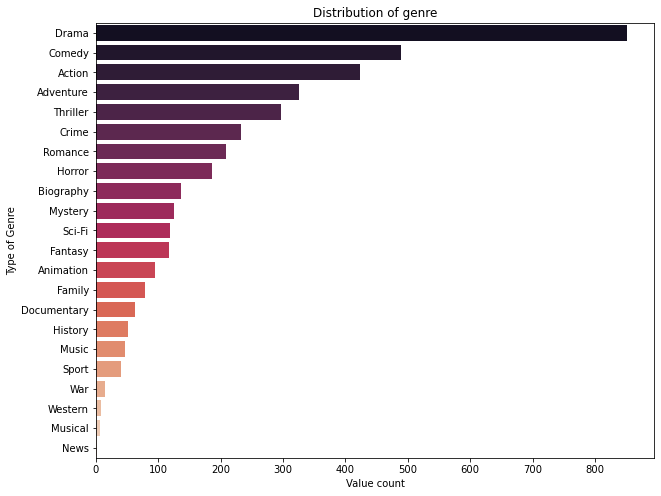

In [38]:
# Plot genre
genre =new_data_exploded.genres.value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=genre.values, y=genre.index, palette='rocket')
plt.ylabel('Type of Genre')
plt.xlabel('Value count')
plt.title('Distribution of genre')
;


**Top Genres by Count:** Drama, Comedy, Action, Adventure, and Thriller are the top five genres. These genres have strong representation, suggesting high popularity or demand, potentially due to their broad appeal across various demographics.

#### 2.) Studio Distribution

''

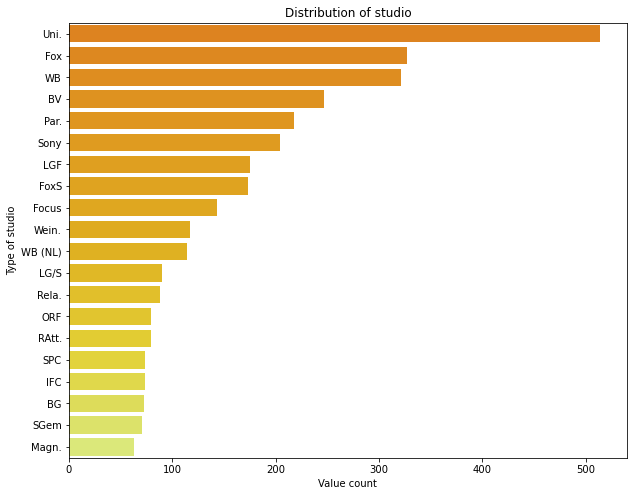

In [39]:
# Plot twenty most appearing studio
studio =new_data_exploded.studio.value_counts().head(20)


plt.figure(figsize=(10,8))
sns.barplot(x=studio.values, y=studio.index, palette='Wistia_r')
plt.ylabel('Type of studio')
plt.xlabel('Value count')
plt.title('Distribution of studio')
;

The biggest film studios, including Universal, Fox, Warner Bros., and Buena Vista, dominate the market with popular franchises that appeal to a wide range of viewers. Following with varied portfolios that combine blockbuster hits with genre-specific films in the action, drama, horror, and thriller categories are mid-tier studios like Paramount, Sony, and Lionsgate. Usually concentrating on highly acclaimed, niche, or independent content, specialty and independent studios such as Focus Features, Weinstein, IFC, and Magnolia release fewer films, target certain audiences, and are often recognized at awards and on streaming services.

#### 3.) Distribution of Worldwide gross and Foreign gross

''

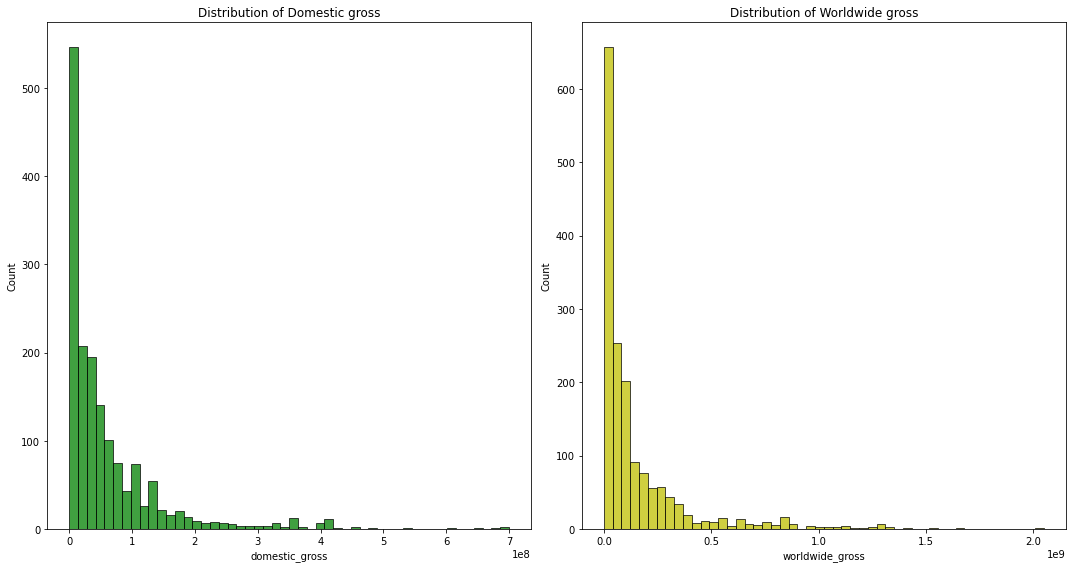

In [57]:
# plot Foreign gross and worldwide gross
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Distribution of Domestic gross')
sns.histplot(data=merged_data,x='domestic_gross',bins=50,color='g')

plt.subplot(1,2,2)
plt.title('Distribution of Worldwide gross')
sns.histplot(data=merged_data,x='worldwide_gross',bins=50,color='y')
plt.tight_layout()
;

Both Domestic and worldwide gross distributions suggest that while most movies do not generate large revenues, a select few achieve substantial earnings. This disparity implies that high-grossing movies are exceptional, likely due to popular franchises, high production values, or successful marketing.

#### 4.) Distribution of production budget

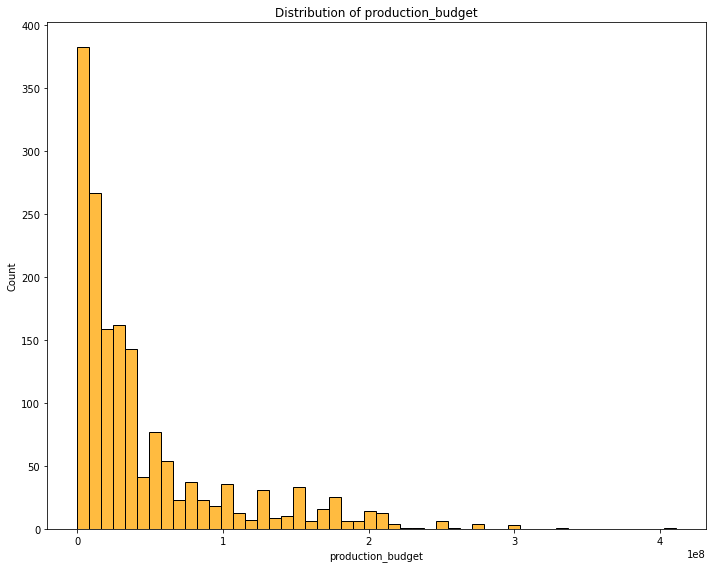

In [41]:
# Plot the budget
plt.figure(figsize=(10,8))
plt.title('Distribution of production_budget')
sns.histplot(data=merged_data,x='production_budget',bins=50,color='orange')
plt.tight_layout()

### Multivariate Analysis

In [42]:
# Grouped genre
genre_data=new_data_exploded.groupby('genres').agg({'popularity':'mean','vote_average':'sum','averagerating':'mean','domestic_gross':'mean','worldwide_gross':'mean','production_budget':'mean'})

#### 5.Plots of different performance and success metrics and the genre

In [43]:
pop_10=genre_data.popularity.sort_values(ascending=False).head(10)
vote_10=genre_data.vote_average.sort_values(ascending=False).head(10)
avgrating_10=genre_data.averagerating.sort_values(ascending=False).head(10)
domestic_10=genre_data.domestic_gross.sort_values(ascending=False).head(10)
worlwide_10=genre_data.worldwide_gross.sort_values(ascending=False).head(10)
prodbudget_10=genre_data.production_budget.sort_values(ascending=False).head(10)

''

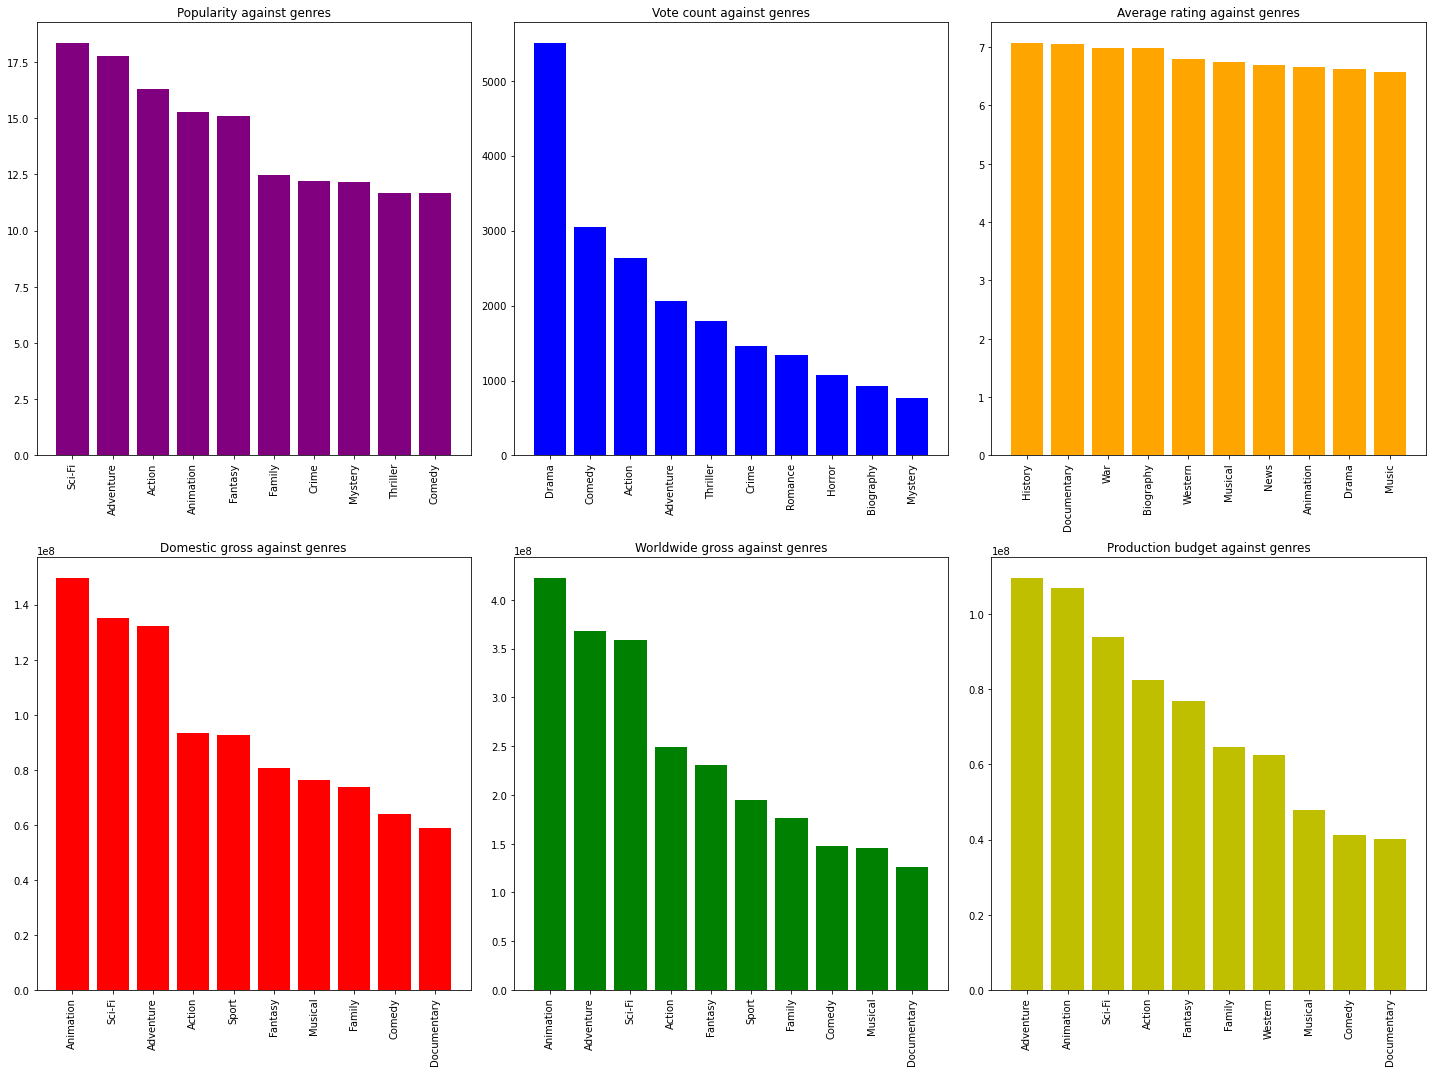

In [45]:
# Visualization of the different genres
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.barh(y=pop_10.index,width=pop_10.values,color ='purple')
plt.xticks(rotation=90)
plt.title('Popularity against genres')

plt.subplot(2,3,2)
plt.barh(y=vote_10.index,width=vote_10.values,color = 'blue')
plt.xticks(rotation=90)
plt.title('Vote count against genres')

plt.subplot(2,3,3)
plt.barh(y=avgrating_10.index,width=avgrating_10.values,color ='orange')
plt.xticks(rotation=90)
plt.title('Average rating against genres')

plt.subplot(2,3,4)
plt.barh(y=domestic_10.index,width=domestic_10.values,color='red')
plt.xticks(rotation=90)
plt.title('Domestic gross against genres')

plt.subplot(2,3,5)
plt.barh(y=worlwide_10.index,width=worlwide_10.values,color='g')
plt.title('Worldwide gross against genres')
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(2,3,6)
plt.barh(y=prodbudget_10.index,width=prodbudget_10.values,color='y')
plt.title('Production budget against genres')
plt.xticks(rotation=90)
plt.tight_layout()
;

**Top Genres by Popularity:** The most popular genres are fantasy, action, sci-fi, adventure, and animation. Large audiences are generally drawn to these genres because of their immersive settings, high-energy narratives, and visual effects.
involvement of the Audience: Popular genres typically have high levels of audience involvement on streaming platforms, social media, and trailers, which is crucial for generating initial viewer interest and marketing momentum.

**High Vote Total Genres:** The genres with the greatest vote averages are drama, comedy, and action, suggesting that they are highly viewed and rated. This popularity indicates that viewers who are interested in plot and character nuance are drawn to these genres.

*Popularity vs. Critical Acclaim:* Although genres like drama and biography have high vote averages, they might not be as popular as more spectacle-driven genres like action or sci-fi, suggesting that they might be more appealing to viewers who value reality and depth above escape.

**Global Blockbusters:** The highest grossing genres globally include animation, adventure, and science fiction. This performance demonstrates the global appeal of these genres, most likely as a result of their universally captivating themes and excellent visual effects that appeal to audiences from various backgrounds.

*High ROI Potential:* Particularly in international markets, genres like animation and adventure that have high global gross relative to their production budget show a great return on investment. These genres might be the best for worldwide releases that maximize profits.

**High-Budget Genres:** Adventure, Animation, Sci-Fi, and Action require high production budgets, which align with their high visual demands and often require advanced effects and well-known actors.

*Cost-Effective Genres:* Comedy and Documentary are among the lower-budget genres but can still generate significant domestic and worldwide gross, making them good options for lower-risk investments.


In [46]:
# Grouped studio
studio_data=new_data_exploded.groupby('studio').agg({'popularity':'mean','vote_average':'sum','averagerating':'mean','domestic_gross':'mean','worldwide_gross':'mean','production_budget':'mean'})

#### 6.) Plots of different performance and success metrics and the studio

In [47]:
pop_10_st=studio_data.popularity.sort_values(ascending=False).head(10)
vote_10_st=studio_data.vote_average.sort_values(ascending=False).head(10)
avgrating_10_st=studio_data.averagerating.sort_values(ascending=False).head(10)
domestic_10_st=studio_data.domestic_gross.sort_values(ascending=False).head(10)
worlwide_10_st=studio_data.worldwide_gross.sort_values(ascending=False).head(10)
prodbudget_10_st=studio_data.production_budget.sort_values(ascending=False).head(10)

In [111]:
c='2.22222'
c[:2]

'2.'

''

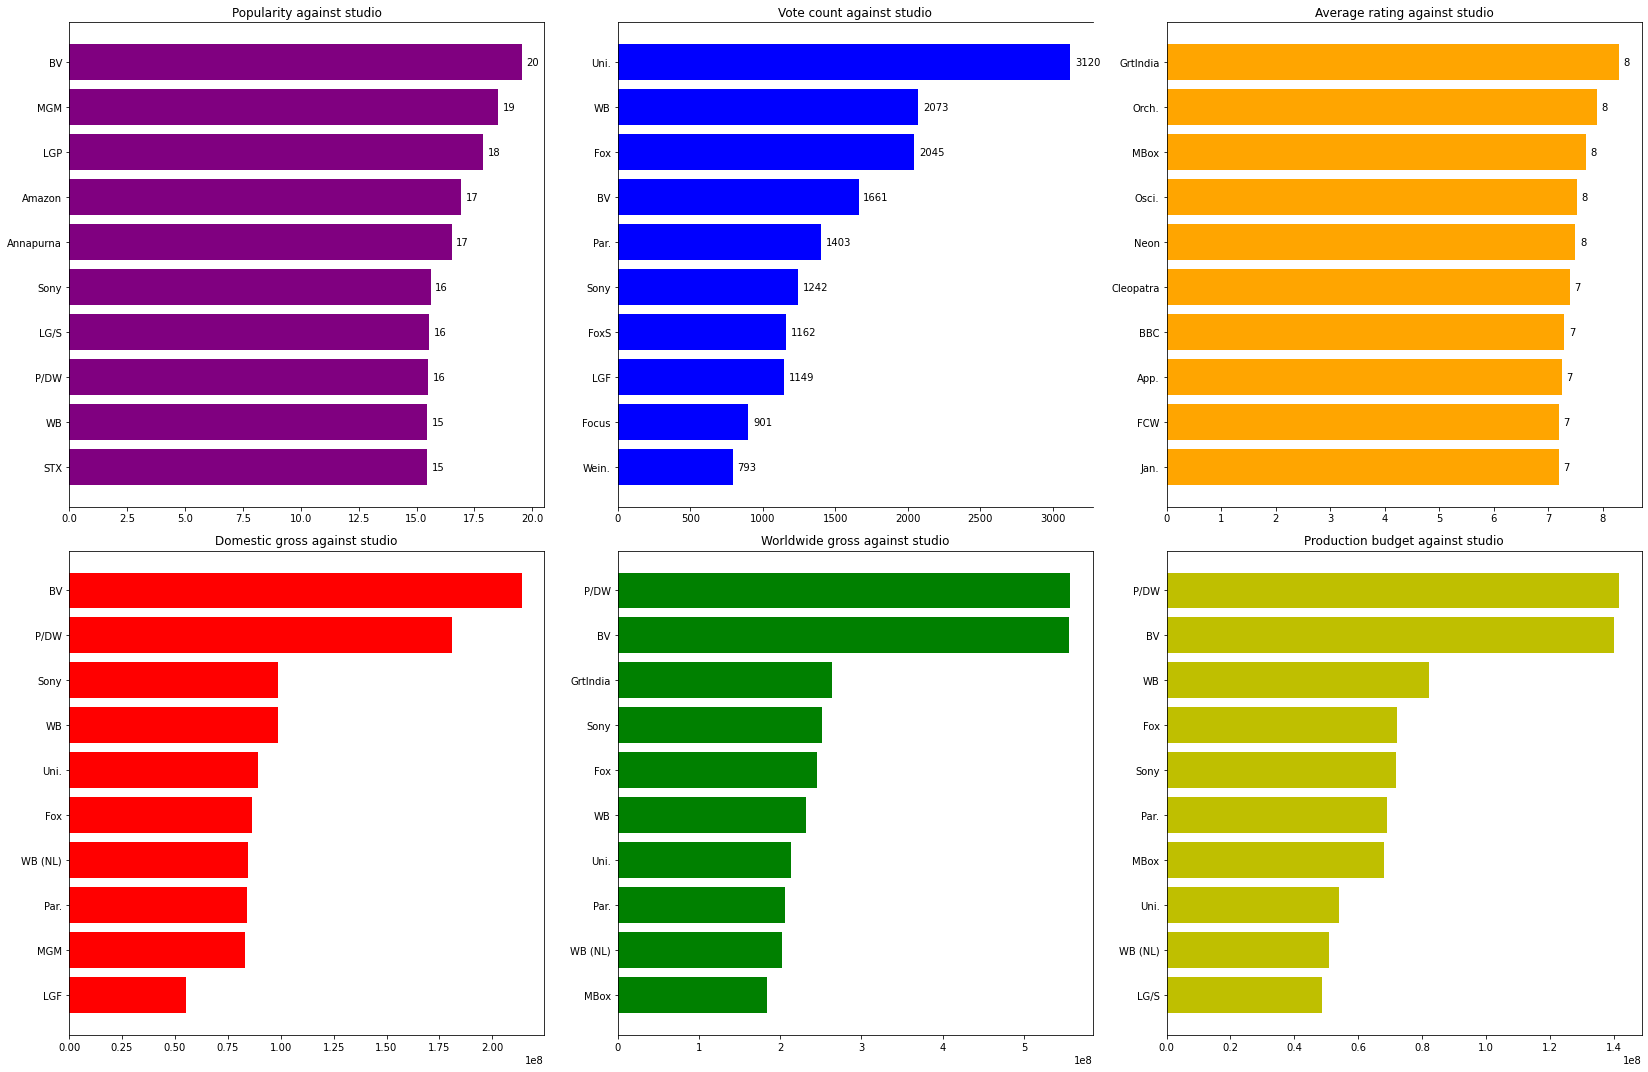

In [117]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)): 
        plt.text(y[i] + (max(y) * 0.01), i,f'{y[i]:.0f}' , va='center',fontsize=10)

# Adjust for the values with more than 4 figures
# def addlabels_4fig(x,y):
#     for i in range(len(x)): 
#         plt.text(y[i] + (max(y) * 0.01), i,f'{y[i]}'[:1] , va='center',fontsize=10)
# Visualization of the different studio
plt.figure(figsize=(23,15))

plt.subplot(2,3,1)
plt.barh(y=pop_10_st.index,width=pop_10_st.values,color ='purple')
# calling the function to add value labels
addlabels(pop_10_st.index, pop_10_st.values)
plt.gca().invert_yaxis()#xticks(rotation=90)
plt.title('Popularity against studio')


plt.subplot(2,3,2)
plt.barh(y=vote_10_st.index,width=vote_10_st.values,color = 'blue')
addlabels(vote_10_st.index, vote_10_st.values)
plt.gca().invert_yaxis()#xticks(rotation=90)
plt.gca().spines['right'].set_visible(False)
plt.title('Vote count against studio')



plt.subplot(2,3,3)
plt.barh(y=avgrating_10_st.index,width=avgrating_10_st.values,color ='orange')
addlabels(avgrating_10_st.index, avgrating_10_st.values)
plt.gca().invert_yaxis()#xticks(rotation=90)
plt.title('Average rating against studio')

plt.subplot(2,3,4)
plt.barh(y=domestic_10_st.index,width=domestic_10_st.values,color='red')
# addlabels_4fig(domestic_10_st.index, domestic_10_st.values)
plt.gca().invert_yaxis()#xticks(rotation=90)
plt.title('Domestic gross against studio')

plt.subplot(2,3,5)
plt.barh(y=worlwide_10_st.index,width=worlwide_10_st.values,color='g')
# addlabels_4fig(worlwide_10_st.index, worlwide_10_st.values)
plt.title('Worldwide gross against studio')
plt.gca().invert_yaxis()#xticks(rotation=90)
plt.tight_layout()

plt.subplot(2,3,6)
plt.barh(y=prodbudget_10_st.index,width=prodbudget_10_st.values,color='y')
# addlabels_4fig(prodbudget_10_st.index, prodbudget_10_st.values)
plt.title('Production budget against studio')
plt.gca().invert_yaxis()#xticks(rotation=90)
plt.tight_layout()
;

#### 7.) Correlation Analysis

In [49]:
# Filter the data columns to be able to understand factors that
# influence a movie success
fc_movies = merged_data.loc[:,['production_budget','domestic_gross','worldwide_gross','runtime_minutes','averagerating','popularity']]

''

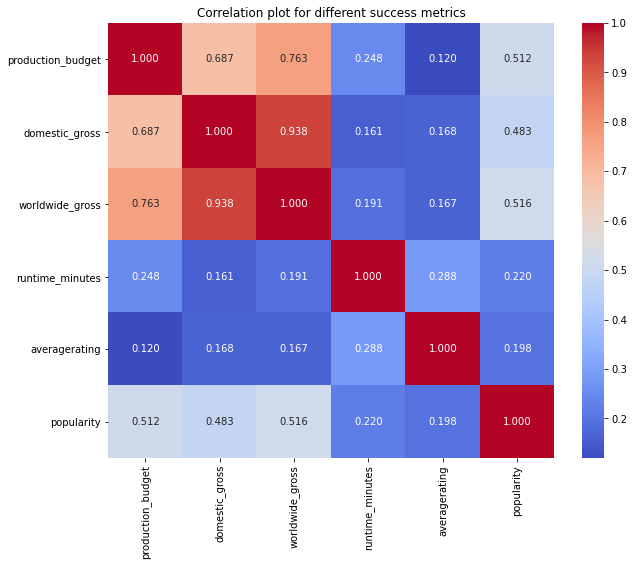

In [50]:
plt.figure(figsize=(10,8))
corr_data=fc_movies.corr()
sns.heatmap(corr_data,annot=True,fmt=".3f",cmap="coolwarm")
plt.title('Correlation plot for different success metrics')
;

Both **domestic gross** (0.48) and **worldwide gross** (0.52) have moderately positive associations with the **popularity** of films, suggesting that popular films tend to bring in more money. Though popularity plays a role in box office success, it is not the only one, as evidenced by the weaker association between popularity and production expenditure. Furthermore, there is a moderate correlation between popularity and production budget (0.51), suggesting that movies with bigger budgets typically have greater appeal and visibility due to improved marketing campaigns and better production quality.

However, there is a substantial positive association between the **production budget** and the **worldwide gross** (0.76), suggesting that films with larger budgets are more likely to do well in international markets. 


The fact that bigger budgets frequently enable higher production quality, more intensive marketing, and wider distribution channels—all of which contribute to global success—supports this association. High-budget movies are more likely to succeed in the US market, according to the strong link with **domestic gross** (0.69). This link suggests that overseas markets might react more favorably to high-budget movies, despite the fact that it is marginally less than that with global gross. All things considered, although larger production expenses increase a movie's chances of being well-known and making money, the relationship is nuanced and impacted by other variables.

#### 8.) Trend Analysis for the production cost and gross returns

In [51]:
# Created a year variable from the release date 
merged_data['year']=[date.year for date in merged_data.release_date]

In [52]:
# budgets and revenue ,vote_count average rating
filter_data = merged_data[merged_data['year']>=2010]

''

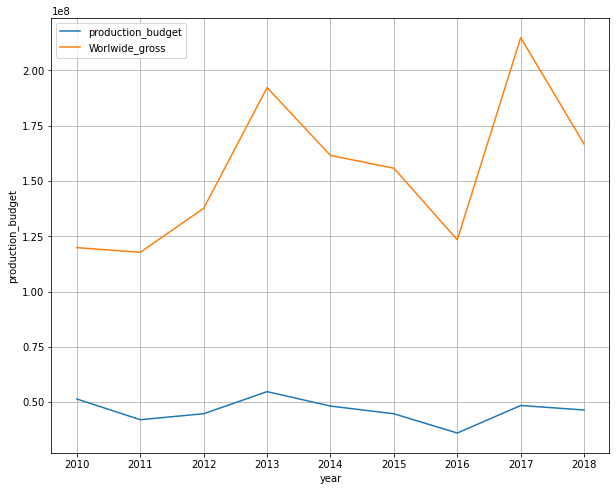

In [53]:
plt.figure(figsize=(10,8))
sns.lineplot(data=filter_data,x='year',y='production_budget',label='production_budget',ci=None)
sns.lineplot(data=filter_data,x='year',y='worldwide_gross',label='Worlwide_gross',ci=None)
# sns.lineplot()
plt.grid()
;

''

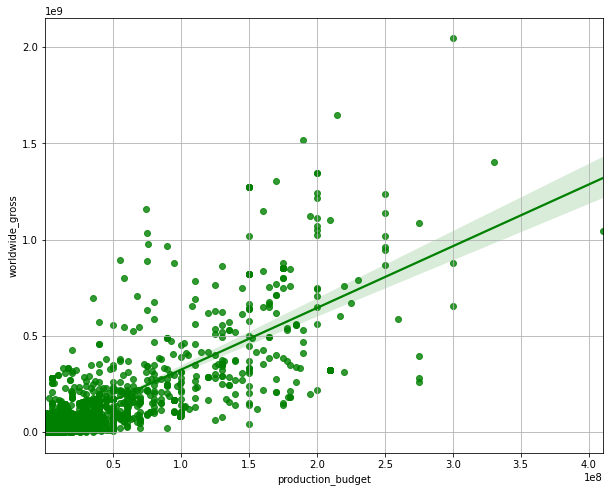

In [54]:
# Scatter plot for the budget against worlwide gross
plt.figure(figsize=(10,8))
sns.regplot(data=merged_data,x='production_budget',y='worldwide_gross',color='g')
plt.grid()
;

**Big Budgets for Spectacle and Quality:** High-budget films generally mean bigger names, advanced special effects, and quality production, which can translate to high box office sales. For instance, studios that invest in high-quality CGI, well-known actors, or top directors often attract larger audiences globally, especially in genres like sci-fi and adventure.

Closing the connection to the SQLite database.

In [55]:
conn.close()

In [56]:
# Delete the large file 

import os

# Specify the path to the file you want to delete
file_path = 'im.db'

# Check if the file exists before attempting to delete
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")



im.db has been deleted.
